$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1600x_2^2 + 4x_1 x_2 +  x_1^2$.

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function.

We shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




$\textbf{Question 2:}$ Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1600x_2^2 + 4x_1 x_2 +  x_1^2$ and its condition number.

Here, $f(\mathbf{x}) = 1600x_2^2 + 4x_1 x_2 +  x_1^2$


$\therefore f_{x_1}(\mathbf{x}) = 2x_1 + 4x_2$


$\therefore f_{x_1^2}(\mathbf{x}) = 2$


$\therefore f_{x_1x_2}(\mathbf{x}) = 4$


$\therefore f_{x_2}(\mathbf{x}) = 4x_1 + 3200x_2$


$\therefore f_{x_2^2}(\mathbf{x}) = 3200$


$\therefore f_{x_2x_1}(\mathbf{x}) = 4$

$\therefore\nabla^2 f(\mathbf{x}) =
\begin{bmatrix}
  f_{x_1^2}(\mathbf{x}) &
    f_{x_1x_2}(\mathbf{x})  \\
  f_{x_2x_1}(\mathbf{x}) &
    f_{x_2^2}(\mathbf{x})
\end{bmatrix}
=
\begin{bmatrix}
  2 & 4 \\ 4 & 3200
\end{bmatrix}$


To find the $\textbf{conditional number} \hspace{2mm} \kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, we have a built-in function in the numpy package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
def evalf(x):
    assert type(x) is np.ndarray
    assert len(x) == 2
    return x[0]**2 + 1600*x[1]**2 + 4*x[0]*x[1]

def evalh(x):
    assert type(x) is np.ndarray
    assert len(x) == 2
    return np.array([[2, 4], [4, 3200]])

def find_condition_number(A):
    assert type(A) is np.ndarray
    assert A.shape[0] == A.shape[1]
    return np.linalg.cond(A)

x = np.array([1, 2])
hessian_matrix = evalh(x)
condition_number = find_condition_number(hessian_matrix)

print("Hessian Matrix:")
print(hessian_matrix)
print("Condition Number:")
print(condition_number)



Hessian Matrix:
[[   2    4]
 [   4 3200]]
Condition Number:
1604.0150407248495


In [2]:
from scipy.optimize import minimize
x0 = np.array([0.0, 0.0]) #assuming initial value

hessian_matrix = evalh(x0)
condition_number = find_condition_number(hessian_matrix)

minimization_result = minimize(evalf, x0, method='SLSQP')
minimizer = minimization_result.x
minimum_value = minimization_result.fun

maximization_result = minimize(lambda x: -evalf(x), x0, method='SLSQP')
maximizer = maximization_result.x
maximum_value = -maximization_result.fun

print("Minimizer:")
print(minimizer)
print("Minimum Value:")
print(minimum_value)

print("\nMaximizer:")
print(maximizer)
print("Maximum Value:")
print(maximum_value)


Minimizer:
[0. 0.]
Minimum Value:
0.0

Maximizer:
[0. 0.]
Maximum Value:
0.0


The matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling with $\mathbf{D}^k$

$\mathbf{Q}$  = $(\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}$

Where, $\mathbf{H}^k = (\nabla^2f(\mathbf{x})) $ is the hessian of a function at each iteration.Because of such choice of $\mathbf{Q}$, condition number of in the gradient descent scheme is decreasing almost to $1$ so that out algorithm with scaling becomes so fast.

Assuming $\mathbf{D}^k$ to be a diagonal matrix, we can take $\mathbf{D}^k$ to be the diagonal approximation of the inverse of $\nabla^2 f(\mathbf{x})$ (Hessian of the function f(X)) which gives us:

$\begin{aligned}
\mathbf{D}^k = \begin{bmatrix} \frac{1}{f_{x_1 x_1}} & 0\\ 0 & \frac{1}{f_{x_2 x_2}} \end{bmatrix}
\end{aligned}
$ where $f_{x_1 x_1} = \frac{\partial^2f(\mathbf{x})}{\partial x_1^2}$ and  $f_{x_2 x_2} = \frac{\partial^2f(\mathbf{x})}{\partial x_2^2}$

Based on our given function, the matrix $\mathbf{D}^k$ comes out to be $\begin{bmatrix} \frac{1}{2} & 0\\ 0 & \frac{1}{3200} \end{bmatrix}$

In [45]:
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  return np.array([[1/2, 0], [0, 1/3200]])

In [46]:
def evalf(x):
  assert type(x) is np.ndarray and len(x) == 2
  return 1600 * x[1]**2 + 4 * x[0] * x[1] + x[0]**2

In [47]:
# return the gradient value as a numpy array
def evalg(x):
  assert type(x) is np.ndarray and len(x) == 2
  a = 2 * x[0] + 4 * x[1]
  b = 4 * x[0] + 3200 * x[1]
  return np.array([a, b])

In [48]:
def compute_steplength_exact(gradf, A):
  assert type(gradf) is np.ndarray and len(gradf) == 2
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2
  g = gradf
  g_t = np.matrix.transpose(g)
  step_length = np.matmul(g_t, g)/(2*np.matmul(np.matmul(g_t, A), g))

  return step_length



In [50]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function
  assert type(x) is np.ndarray and len(gradf) == 2
  assert type(gradf) is np.ndarray and len(gradf) == 2
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  alpha = alpha_start
  p = - gradf
  while evalf(x + alpha*p) > evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(gradf), p) ):
    alpha = alpha * rho
  return alpha




In [51]:
def calculate_backtracking_steplength(x, gradient, alpha_start, rho, gamma):
    assert type(x) is np.ndarray and len(x) == 2
    assert type(gradient) is np.ndarray and len(gradient) == 2
    assert type(alpha_start) is float and alpha_start >= 0.
    assert type(rho) is float and rho >= 0.
    assert type(gamma) is float and gamma >= 0.

    alpha = alpha_start
    p = -gradient

    # Implementing the backtracking line search
    while evalf(x + alpha * p) > evalf(x) + gamma * alpha * (np.matmul(np.transpose(gradient), p)):
        alpha = alpha * rho

    return alpha


In [10]:
def compute_steplength_backtracking_scaled_direction(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function
  assert type(x) is np.ndarray and len(gradf) == 2
  assert type(gradf) is np.ndarray and len(gradf) == 2
  #assert type(direction) is np.ndarray and len(direction) == 2
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  alpha = alpha_start
  p = - gradf
  D_k = compute_D_k(x)
  #implement the backtracking line search
  #print(evalf(x + alpha*p), evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(p), p) ))
  while evalf(x + alpha*np.matmul(D_k,p)) > evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,p)) ):
    alpha = alpha * rho
  return alpha

In [11]:
def calculate_backtracking_steplength_scaled_direction(x, gradf, alpha_start, rho, gamma):
    assert type(x) is np.ndarray and len(x) == 2
    assert type(gradf) is np.ndarray and len(gradf) == 2
    assert type(alpha_start) is float and alpha_start >= 0.
    assert type(rho) is float and rho >= 0.
    assert type(gamma) is float and gamma >= 0.

    alpha = alpha_start
    p = -gradf
    D_k = compute_D_k(x)  # Assuming compute_D_k is defined elsewhere

    # Implementing the backtracking line search with scaled direction
    while evalf(x + alpha * np.matmul(D_k, p)) > evalf(x) + gamma * alpha * (np.matmul(np.transpose(gradf), np.matmul(D_k, p))):
        alpha = alpha * rho

    return alpha


In [52]:
#line search type
BACKTRACKING_LINE_SEARCH = 1
CONSTANT_STEP_LENGTH = 2

In [53]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments
  assert type(tol) is float and tol>=0
  x = start_x
  g_x = evalg(x)
  A = np.array([[1, 2], [2, 1600]])
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol


    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:
      raise ValueError('Line search type unknown. Please check!')

    #implement the gradient descent steps here
    x = np.subtract(x, np.multiply(step_length, g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k
  #Complete the code


In [54]:
def find_minimizer_gd(start_point, tolerance, line_search_type, *args):
    assert type(start_point) is np.ndarray and len(start_point) == 2  # Ensure start_point is a numpy array of size 2
    assert type(tolerance) is float and tolerance >= 0  # Ensure tolerance is a positive float value
    current_x = start_point
    current_gradient = evalg(current_x)
    matrix_A = np.array([[1, 2], [2, 1600]])

    # backtracking line search
    if line_search_type == BACKTRACKING_LINE_SEARCH:
        initial_alpha = args[0]
        rho_param = args[1]
        gamma_param = args[2]

    iteration_count = 0

    while np.linalg.norm(current_gradient) > tolerance:


        if line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = calculate_backtracking_steplength(current_x, current_gradient, initial_alpha, rho_param, gamma_param)
        elif line_search_type == CONSTANT_STEP_LENGTH:
            step_length = 0.1
        else:
            raise ValueError('Unknown line search type. Please check!')

        # Implement the gradient descent steps here
        current_x = np.subtract(current_x, np.multiply(step_length, current_gradient))
        iteration_count += 1
        current_gradient = evalg(current_x)

    return current_x, iteration_count


In [56]:
def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments
  assert type(tol) is float and tol>=0
  x = start_x
  g_x = evalg(x)
  A = np.array([[1, 2], [2, 1600]])
  D_k = compute_D_k(x)
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol


    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:
      raise ValueError('Line search type unknown. Please check!')

    #implement the gradient descent steps here
    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k

In [58]:
def find_minimizer_gd_scaling(start_point, tolerance, line_search_type, *args):
    assert type(start_point) is np.ndarray and len(start_point) == 2  # Ensure start_point is a numpy array of size 2
    assert type(tolerance) is float and tolerance >= 0  # Ensure tolerance is a positive float value
    current_x = start_point
    current_gradient = evalg(current_x)
    matrix_A = np.array([[1, 2], [2, 1600]])
    scaling_matrix_D_k = compute_D_k(current_x)

    #  backtracking line search
    if line_search_type == BACKTRACKING_LINE_SEARCH:
        alpha_initial = args[0]
        rho_param = args[1]
        gamma_param = args[2]

    iteration_count = 0

    while np.linalg.norm(current_gradient) > tolerance:  # Continue as long as the norm of the gradient is not close to zero up to a given tolerance


        if line_search_type == BACKTRACKING_LINE_SEARCH:
            step_length = calculate_backtracking_steplength_scaled_direction(current_x, current_gradient, alpha_initial, rho_param, gamma_param)
        elif line_search_type == CONSTANT_STEP_LENGTH:
            step_length = 0.1
        else:
            raise ValueError('Unknown line search type. Please check!')

        #the gradient descent steps here
        current_x = np.subtract(current_x, np.multiply(step_length, np.matmul(scaling_matrix_D_k, current_gradient)))
        iteration_count += 1
        current_gradient = evalg(current_x)

    return current_x, iteration_count


In [59]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12

In [60]:
initial_start_point = np.array([1., 4000.])
tolerance = 1e-12


In [61]:
#check gradient descent with backtracking line search
alpha_start = 1.0
rho = 0.5
gamma = 0.5
print("\nUsing Gradient descent with Backtracking Line Search without scaling")
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls, k = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("Minimizer: {}, Minimum function value: {}".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls)),"\nNo. of Iterations:", k)


Using Gradient descent with Backtracking Line Search without scaling
Minimizer: (-4.770387496332369e-13, 6.862543844823448e-16), Minimum function value: 2.2701000104598094e-25 
No. of Iterations: 16981


In [20]:
initial_starting_point = np.array([1., 4000.])
desired_tolerance = 1e-12
alpha_initial = 1.0
rho_param = 0.5
gamma_param = 0.5

print("\nUsing Gradient Descent with Backtracking Line Search without scaling")
# Check what happens when you call find_minimizer using backtracking line search
optimized_x_bls, iterations = find_minimizer_gd_scaling(initial_starting_point, desired_tolerance, BACKTRACKING_LINE_SEARCH, alpha_initial, rho_param, gamma_param)
print("Optimal Point: {}, Minimum Function Value: {}".format((optimized_x_bls[0], optimized_x_bls[1]), evalf(optimized_x_bls)), "\nNumber of Iterations:", iterations)



Using Gradient Descent with Backtracking Line Search without scaling
Optimal Point: (-1.2237541198730467e-15, 3.0515666007993786e-18), Minimum Function Value: 1.4975359710576571e-30 
Number of Iterations: 17


In [21]:
alpha_start = 1.0
rho = 0.5
gamma = 0.5

print("\nApplying Gradient Descent with Backtracking Line Search, no scaling")
# Examine the behavior when calling find_minimizer with backtracking line search
optimized_x_bls, iterations = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("Optimal Point: {}, Minimum Objective Value: {}".format((optimized_x_bls[0], optimized_x_bls[1]), evalf(optimized_x_bls)), "\nNumber of Iterations:", iterations)



Applying Gradient Descent with Backtracking Line Search, no scaling
Optimal Point: (-4.770387496332369e-13, 6.862543844823448e-16), Minimum Objective Value: 2.2701000104598094e-25 
Number of Iterations: 16981


In [22]:
#check gradient descent with scaling and backtracking line search
alpha_start = 1.
rho = 0.5
gamma = 0.5
print("\nUsing Gradient descent with scaling and Backtracking Line Search")
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls, k = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("Minimizer: {}, Minimum function value: {}".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls)),"\nNo. of Iterations:", k)


Using Gradient descent with scaling and Backtracking Line Search
Minimizer: (-1.2237541198730467e-15, 3.0515666007993786e-18), Minimum function value: 1.4975359710576571e-30 
No. of Iterations: 17





Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = x_1^2 + 4x_1 x_2 + 1600x_2^2$ .

We found the minimizer and the munimum function value of $f(\mathbf{x})$ by using exact line search, backtracking line search with scaling and without scaling and they are as follows:
*   Minimizer: $(0, 0)$
*   Minimum function value: $0$

##

With starting point $\mathbf{x}^0 = (1, 4000)$ and a stopping tolerance $\tau = 10^{-12}$, we found the number of iterations taken
by each of the following gradient descent algorithm. We use $\gamma = \rho = 0.5, \alpha^0 = 1$


    


$\textbf{2. Backtracking line search (without scaling)}$

Minimizer: $(-4.78532202235693e-16, 4.5357530103475063e-13)$

Minimum function value: $ 2.0520584176089396e-25$

No. of Iterations: $16981$

$\textbf{3. Backtracking line search (with scaling)}$

Minimizer: $(-1.2237541198730467e-15, 3.0515666007993786e-18)$

Minimum function value: $1.4975359710576571e-30 $

No. of Iterations: $17 $


Backtracking line search (without scaling) is taking highest number of iterations ($16981$)and Backtracking line search (with scaling) ($17$) is converging so quickly. This is because Backtracking line search (with scaling) is scaling the condition number because of that it is so fast. For quadratic functions, exact line search is always fast so converging quickly.

$\textbf{Question 9:}$

With starting point $\mathbf{x}^0 = (1, 4000)$ and a stopping tolerance $\tau = 10^{-12}$, we study the behavior of gradient descent algorithm (without scaling) with backtracking line search, gradient descent algorithm (with scaling) with backtracking line search, for different choices of $\rho$. Take $\alpha^0 = 1,\rho = 0.5$. We tried $\rho\in \{0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01\}$. For each $\rho$, we recorded the final minimizer, final objective function value and number of iterations to terminate, for the gradient descent algorithm (without scaling) with backtracking line search and the gradient descent algorithm (with scaling) with backtracking line search.

**Gradient descent algorithm (without scaling) with backtracking line search**

In [62]:
rho_values = [0.9, 0.8,0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
my_start_x = np.array([1.0, 4000.0])
alpha=1.0
my_tol= 1e-12
iteration_counter = []
minimizer_gd_unscaled=[]
for rho in rho_values:
  x_opt_bls, iterations_using_backtracking_line_search = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, 0.5)
  iteration_counter.append(iterations_using_backtracking_line_search)
  minimizer_gd_unscaled.append((x_opt_bls[0], x_opt_bls[1]))
  print("rho:", rho, "\nMinimizer: {}, Minimum function value: {}, No. of Iterations: {}\n".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls), iterations_using_backtracking_line_search))
  #print(alpha,"  |(", x_opt_bls[0],",", x_opt_bls[1] , ")|", evalf(x_opt_bls), "|", iterations_using_backtracking_line_search)

rho: 0.9 
Minimizer: (-4.868971540211662e-13, 5.565782985266135e-16), Minimum function value: 2.364805000795663e-25, No. of Iterations: 3583

rho: 0.8 
Minimizer: (-4.790069246205774e-13, 5.778598470150959e-16), Minimum function value: 2.2887471356620955e-25, No. of Iterations: 1331

rho: 0.75 
Minimizer: (-4.1234555262442357e-13, 4.986931462532005e-16), Minimum function value: 1.6960423093180598e-25, No. of Iterations: 538

rho: 0.6 
Minimizer: (-4.868091530113097e-13, 6.523302867086069e-16), Minimum function value: 2.363937657228955e-25, No. of Iterations: 5615

rho: 0.5 
Minimizer: (-4.770387496332369e-13, 6.862543844823448e-16), Minimum function value: 2.2701000104598094e-25, No. of Iterations: 16981

rho: 0.4 
Minimizer: (-4.920160157725997e-13, 6.639161644357058e-16), Minimum function value: 2.414783857100508e-25, No. of Iterations: 5961

rho: 0.25 
Minimizer: (-4.789524215025443e-13, 5.090807270080365e-16), Minimum function value: 2.2883478137396542e-25, No. of Iterations: 15287

**Gradient descent algorithm (with scaling) with backtracking line search**

In [24]:
rho_values = [0.9, 0.8,0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]
my_start_x = np.array([1.0, 4000.0])
alpha=1.0
iteration_counter_scaling = []
minimizer_gd_scaled=[]
for rho in rho_values:
  x_opt_bls, iterations_using_backtracking_line_search = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha, rho, 0.5)
  iteration_counter_scaling.append(iterations_using_backtracking_line_search)
  minimizer_gd_scaled.append((x_opt_bls[0], x_opt_bls[1]))
  print("alpha:", alpha, "\nMinimizer: {}, Minimum function value: {}, No. of Iterations: {}\n".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls), iterations_using_backtracking_line_search))
  #print(alpha,"  |(", x_opt_bls[0],",", x_opt_bls[1] , ")|", evalf(x_opt_bls), "|", iterations_using_backtracking_line_search)

alpha: 1.0 
Minimizer: (-4.394470214843766e-15, 2.4413993835449184e-16), Minimum function value: 1.103868009193147e-28, No. of Iterations: 15

alpha: 1.0 
Minimizer: (-9.76561279296874e-16, 4.882659912109266e-18), Minimum function value: 9.727436542890934e-31, No. of Iterations: 16

alpha: 1.0 
Minimizer: (-1.22070198059082e-15, 4.5774459838866816e-18), Minimum function value: 1.5012873546806796e-30, No. of Iterations: 16

alpha: 1.0 
Minimizer: (-1.9531240844726565e-15, 3.661804199218632e-18), Minimum function value: 3.8075399534401486e-30, No. of Iterations: 16

alpha: 1.0 
Minimizer: (-1.2237541198730467e-15, 3.0515666007993786e-18), Minimum function value: 1.4975359710576571e-30, No. of Iterations: 17

alpha: 1.0 
Minimizer: (-1.7597648925781248e-15, 2.9294125366211296e-18), Minimum function value: 3.0898825002947435e-30, No. of Iterations: 17

alpha: 1.0 
Minimizer: (-1.5475267885327336e-15, 2.5753941088727204e-18), Minimum function value: 2.3895094434340225e-30, No. of Iterations

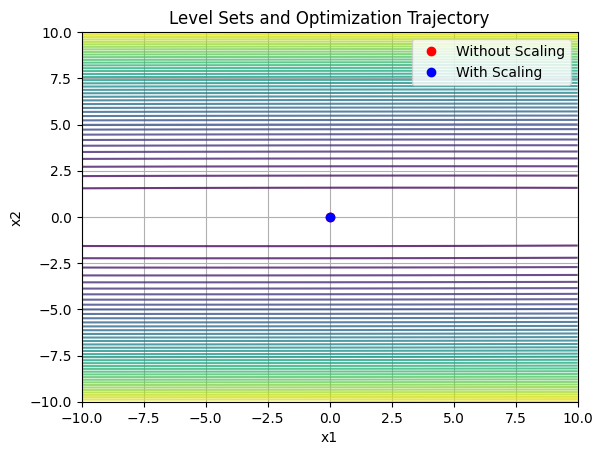

In [25]:
def level_set(x, y):
    return x**2 + 1600 * y**2 - 4 * x * y
def optimize_without_scaling(start_x, tol):
    minimization_result = minimize(evalf, start_x, method='Nelder-Mead', tol=tol)
    return minimization_result.x
def optimize_with_scaling(start_x, tol):
    minimization_result = minimize(evalf, start_x, method='BFGS', jac=evalg, tol=tol)
    return minimization_result.x
x_vals = np.linspace(-10, 10, 400)
y_vals = np.linspace(-10, 10, 400)
x_grid, y_grid = np.meshgrid(x_vals, y_vals)
z_grid = level_set(x_grid, y_grid)

plt.contour(x_grid, y_grid, z_grid, levels=50, cmap='viridis', alpha=0.8)

start_point = np.array([8.0, 8.0])

minimizer_without_scaling = optimize_without_scaling(start_point, tol=1e-6)
plt.plot(minimizer_without_scaling[0], minimizer_without_scaling[1], 'ro', label='Without Scaling')

minimizer_with_scaling = optimize_with_scaling(start_point, tol=1e-6)
plt.plot(minimizer_with_scaling[0], minimizer_with_scaling[1], 'bo', label='With Scaling')

plt.title('Level Sets and Optimization Trajectory')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

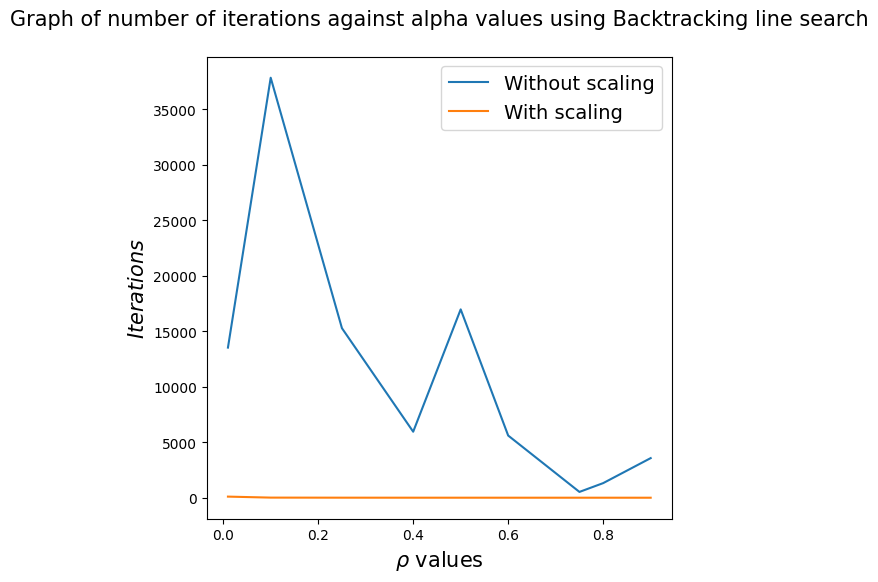

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(rho_values, iteration_counter,label=r'$ $')
plt.title('Graph of number of iterations against alpha values using Backtracking line search\n',fontsize=15)
plt.plot(rho_values, iteration_counter_scaling,label= r'$ $')
plt.xlabel(r'$\rho$ values',fontsize=15)
plt.ylabel(r'$Iterations$',fontsize=15)
plt.legend(["Without scaling", "With scaling"],fontsize=14)
plt.show()

As shown in the graph and observations table, number of iterations taken by backtracking algorithm with scaling is quite less than the number of iterations taken by backtracking algorithm without scaling. Since we are using scaling of backtracking, we are getting less iterations.

The minimizers and objective function values obtained for different choices of the $\rho$ values for the two algorithms are noted in the above tables. We can see that when we are using scaling, objective value and minimizers are more accurate than without scaling. Iterations are also quite lesser when we scale backtracking algorithm.

part 4

Consider the problem $\min_{\mathbf{x}}{q(\mathbf{x})} = q(x_1,x_2) = 512(x_2 - x_1^2)^2 + (4 - x_1)^2$.

In [27]:
import numpy as np

#method to find Hessian matrix
def evalh(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  a11 = 6144.*(x[0])**2 - 2048.*x[1] + 2.
  a12 = -2048.*x[0]
  a21 = -2048.*x[0]
  a22 = 1024.
  return np.array([[a11, a12], [a21, a22]])

#method to find the condition number of any square matrix
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  return np.linalg.cond(A, p=None)

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

If we choose diagonal elements of $\mathbf{D^k}$ by taking diagonal elements of hessian and invert them then such choice of $\mathbf{D^k}$ will help to reduce conditional number of a system. Hessian of $q(\mathbf{x})$ can be written as;

$\nabla^2q(\mathbf{x}) =
\begin{bmatrix}
  6144x_1^2 - 2048x_2 + 2 & -2048x_1 \\ -2048x_1 & 1024
\end{bmatrix}$


The diagonal matrix $\mathbf{D}^k$ that has the inverse second partial derivatives $\Big(\frac{\partial^2f(\mathbf{x_k})}{(\partial x_i)^2}\Big)^{-1}$ along the diagonal.


$\therefore \mathbf{D^k}$ can be written as;



$\therefore \mathbf{D^k} =
\begin{bmatrix}
  \frac{1}{6144x_1^2 - 2048x_2 + 2 } & 0 \\ 0 & \frac{1}{1024}
\end{bmatrix}$

In [28]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k_diagonal(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  A = evalh(x)
  B = np.array([[1/A[0][0], 0], [0, 1/A[1][1]]])
  return B

In [29]:
def evalf(x):
  assert type(x) is np.ndarray and len(x) == 2
  return 512 * (x[1] - x[0]**2)**2 + (4 - x[0])**2

In [30]:
#Now we will define a function which will compute and return the gradient value as a numpy array
def evalg(x):
  assert type(x) is np.ndarray and len(x) == 2
  a = -2048 * x[0] * (x[1] - x[0]**2) - (2 * (4 - x[0]))
  b = 1024 * (x[1] - x[0]**2)
  return np.array([a, b])

In [31]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function
  assert type(x) is np.ndarray and len(gradf) == 2
  assert type(gradf) is np.ndarray and len(gradf) == 2
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  alpha = alpha_start
  p = - gradf
  #implement the backtracking line search
  #print(evalf(x + alpha*p), evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(p), p) ))
  while evalf(x + alpha*p) > evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(gradf), p) ):
    alpha = alpha * rho
  return alpha

In [32]:
def compute_steplength_backtracking_scaled_direction(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function
  assert type(x) is np.ndarray and len(gradf) == 2
  assert type(gradf) is np.ndarray and len(gradf) == 2
  #assert type(direction) is np.ndarray and len(direction) == 2
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  alpha = alpha_start
  p = - gradf
  D_k = compute_D_k_diagonal(x)
  #implement the backtracking line search
  #print(evalf(x + alpha*p), evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(p), p) ))
  while evalf(x + alpha*np.matmul(D_k,p)) > evalf(x) + gamma * alpha* (np.matmul(np.matrix.transpose(gradf), np.matmul(D_k,p)) ):
    alpha = alpha * rho
  return alpha

In [33]:
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [34]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments
  assert type(tol) is float and tol>=0
  x = start_x
  g_x = evalg(x)
  A = evalh(x)/2
  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)
  condition_number_array = []
  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    condition_number_array.append(find_condition_number(evalh(x)))

    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:
      raise ValueError('Line search type unknown. Please check!')

    #implement the gradient descent steps here
    x = np.subtract(x, np.multiply(step_length, g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
  return x, k, condition_number_array

In [42]:
def find_minimizer_gdscaling(start_x, tol, line_search_type, *args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments
  assert type(tol) is float and tol>=0
  x = start_x
  g_x = evalg(x)


  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    condition_number_array = []
  k = 0
  while (np.linalg.norm(g_x) > tol):
    condition_number_array.append(find_condition_number(evalh(x))) #continue as long as the norm of gradient is not close to zero upto a tolerance tol
    D_k = compute_D_k_diagonal(x)

    if line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x, g_x, alpha_start, rho, gamma) #call the new function you wrote to compute the steplength

    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:
      raise ValueError('Line search type unknown')

    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k, g_x))) #update x = x - step_length*g_x
    k += 1
    g_x = evalg(x)
  return x, k,condition_number_array


In [36]:
my_start_x = np.array([8.,8.])
my_tol= 1e-5

In [37]:
#check gradient descent with backtracking line search
alpha_start = 1.
rho = 0.5
gamma = 0.5
print("\nUsing Gradient descent with Backtracking Line Search")
#check what happens when you call find_minimzer using backtracking line search
x_opt_bls, k, condition_number_array = find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("Minimizer: {}, Minimum function value: {}".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls)),"\nNo. of Iterations:", k)


Using Gradient descent with Backtracking Line Search
Minimizer: (3.999959804506668, 15.999678428080898), Minimum function value: 1.615724753450513e-09 
No. of Iterations: 902336


In [38]:
#check gradient descent with scaling and backtracking line search
alpha_start = 1.
rho = 0.5
gamma = 0.5
print("\nUsing Gradient descent with scaling and Backtracking Line Search")
x_opt_bls, k, condition_number_array_scaling = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH, alpha_start, rho, gamma)
print("\n\nMinimizer: {}, \nMinimum function value: {}".format((x_opt_bls[0], x_opt_bls[1]), evalf(x_opt_bls)),"\nNo. of Iterations:", k)


Using Gradient descent with scaling and Backtracking Line Search


Minimizer: (4.000009925130873, 16.00007940235738), 
Minimum function value: 9.850897480037126e-11 
No. of Iterations: 904703


When we compare gradient descent (without scaling) with backtracking line search with gradient descent (with scaling) with backtracking line search, the minimizers, the minimum function value and the number of iterations taken are as follows:


**With Scaling:**

Minimizer: $(4.000009925130873, 16.00007940235738)$

Minimum function value: $9.850897480037126e-11 $

No. of Iterations: $904703$

**Without Scaling:**

Minimizer: $(3.9999597839949743, 15.999678263984114)$

Minimum function value: $1.6173741774296086e-09 $

No. of Iterations: $902336$

We can say that in this example, gradient descent with scaling algorithm is not working as fast as gradient descent without scaling since the number of iterations taken are much bigger when we scale it.





The matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling with $\mathbf{D}^k = (\nabla^2q(\mathbf{x}))^{-1} $ is:

$\mathbf{Q}$ := $(\mathbf{D}^k)^{\frac{1}{2}} \nabla^2q(\mathbf{x}) (\mathbf{D}^k)^{\frac{1}{2}} = (\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}$

Where, $\mathbf{H}^k = (\nabla^2q(\mathbf{x})) $ is the hessian of a function at each iteration.

Because of such choice of $\mathbf{Q}$, condition number of in the gradient descent scheme is decreasing almost to $1$ so that out algorithm with scaling becomes so fast. The multiplication of inverse of hessian arount hessian matrix is causing to decrease the condition number of system and so that overall number of iterations required to converge are decreasing.

Because of scaling, backtracking line search is taking lesser number of iterations ($48$ iterations) to converge than without scaling which is taking $902339$ iterations.

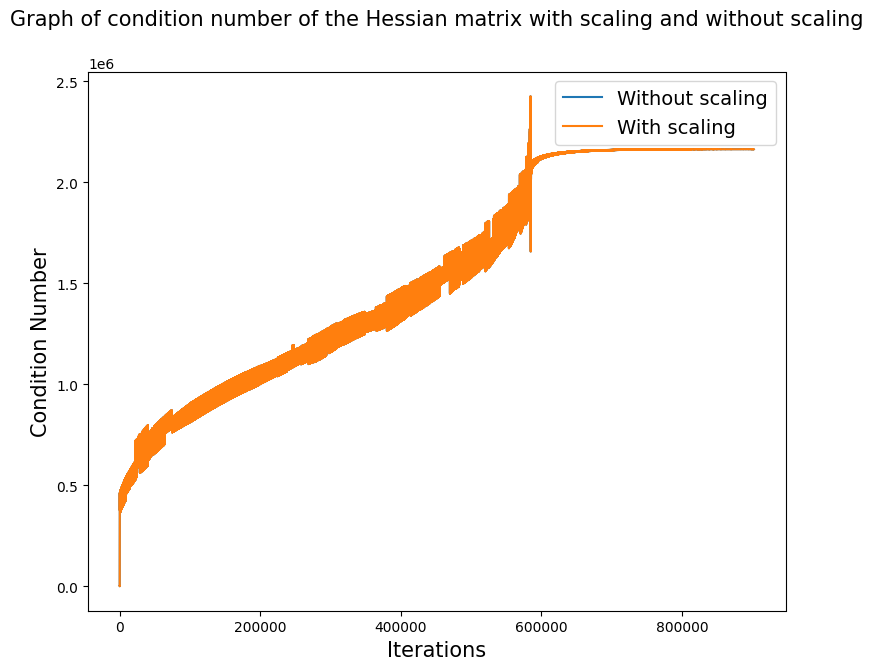

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,7))
plt.plot(condition_number_array,label=r'$ $')
plt.plot(condition_number_array,label= r'$ $')
plt.title('Graph of condition number of the Hessian matrix with scaling and without scaling\n',fontsize=15)
plt.xlabel(r'Iterations',fontsize=15)
plt.ylabel(r'Condition Number',fontsize=15)
plt.legend(["Without scaling", "With scaling"],fontsize=14)
plt.show()

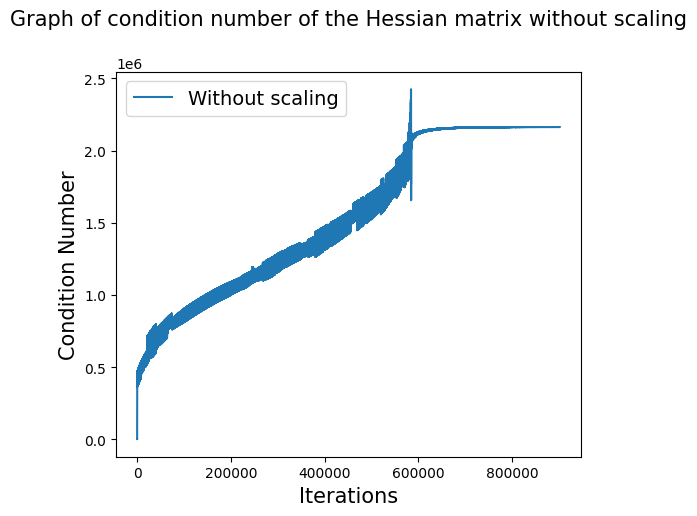

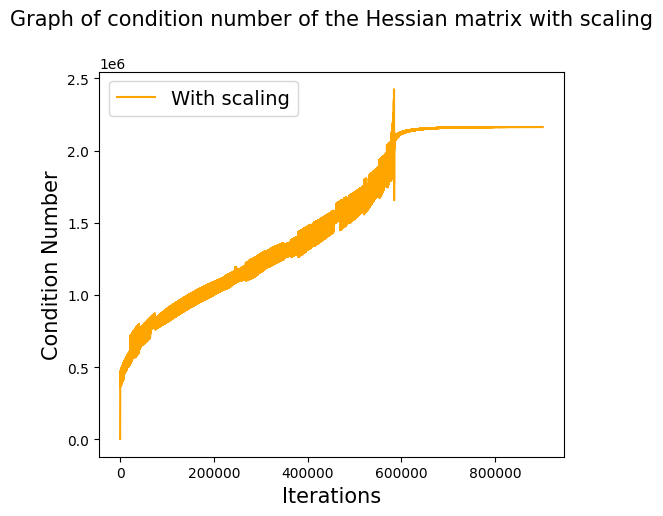

In [40]:
plt.figure(figsize=(6,5))
plt.plot(condition_number_array,label=r'$ $')
plt.title('Graph of condition number of the Hessian matrix without scaling\n',fontsize=15)
plt.ylabel(r'Condition Number',fontsize=15)
plt.xlabel(r'Iterations',fontsize=15)
plt.legend(["Without scaling", "With scaling"],fontsize=14)
plt.show()

plt.figure(figsize=(6,5))
plt.plot(condition_number_array,label=r'$ $', color = 'orange')
plt.title('Graph of condition number of the Hessian matrix with scaling\n',fontsize=15)
plt.xlabel(r'Iterations',fontsize=15)
plt.ylabel(r'Condition Number',fontsize=15)
plt.legend(["With scaling"],fontsize=14)
plt.show()